In [1]:
import pandas as pd
import numpy as np
import os

# Change to project root directory to avoid path issues
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(f"Changed working directory to: {os.getcwd()}")

# Import custom module
from utils.model.model_manager import ModelManager

# Get absolute paths
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "PEPEUSDT_15m_1h-pump05_230520_250302.csv")

# Load historical data
df = pd.read_csv(data_path, parse_dates=['timestamp'])

# Display the first few rows
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2023-05-19 23:00:00,0.000002,0.000002,0.000002,0.000002,4.344075e+10,194.0,1.540235e+10,23565.596800,0,...,NaN,0.549331,0.006579,0.354560,NaN,NaN,NaN,-0.290880,NaN,0.655172
1,2023-05-19 23:15:00,0.000002,0.000002,0.000002,0.000002,4.101543e+11,399.0,3.775390e+11,577634.733038,0,...,NaN,11.575540,0.006536,0.920481,NaN,NaN,NaN,0.840961,NaN,0.655172
2,2023-05-19 23:30:00,0.000002,0.000002,0.000002,0.000002,5.241945e+11,545.0,4.704856e+11,722842.483976,0,...,NaN,8.759924,0.013072,0.897540,NaN,NaN,NaN,0.795080,NaN,0.655172
3,2023-05-19 23:45:00,0.000002,0.000002,0.000002,0.000002,3.889927e+11,874.0,9.431189e+09,14472.614468,0,...,NaN,0.024848,0.013072,0.024245,NaN,NaN,NaN,-0.951510,NaN,0.655172
4,2023-05-20 00:00:00,0.000002,0.000002,0.000002,0.000002,7.326344e+11,1161.0,2.335652e+11,355067.471864,0,...,NaN,0.468002,0.013158,0.318802,NaN,NaN,NaN,-0.362396,NaN,0.689655


In [2]:
# Initialize our ModelManager with symbol and date range
symbol = "PEPEUSDT"
start_date = "2023-05-20"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into our ModelManager
manager.load_data(custom_path=data_path)

# Split and prepare data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(           open      high       low     close        volume  num_trades  \
 0      0.000002  0.000002  0.000002  0.000002  4.344075e+10       194.0   
 1      0.000002  0.000002  0.000002  0.000002  4.101543e+11       399.0   
 2      0.000002  0.000002  0.000002  0.000002  5.241945e+11       545.0   
 3      0.000002  0.000002  0.000002  0.000002  3.889927e+11       874.0   
 4      0.000002  0.000002  0.000002  0.000002  7.326344e+11      1161.0   
 ...         ...       ...       ...       ...           ...         ...   
 59711  0.000013  0.000013  0.000013  0.000013  3.285464e+10      2940.0   
 59712  0.000013  0.000013  0.000013  0.000013  6.837535e+10      3080.0   
 59713  0.000013  0.000013  0.000013  0.000013  3.339416e+10      1269.0   
 59714  0.000013  0.000013  0.000013  0.000013  6.241580e+10      2113.0   
 59715  0.000013  0.000013  0.000013  0.000013  3.047496e+10      2233.0   
 
        taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0        1.

In [3]:
# Configure our model with default parameters
manager.configure_model()

# Train the model and evaluate on test set
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.8678


np.float64(0.8678100175479758)

In [4]:
# Get and print model performance metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8678
AUC-ROC Score: 0.9585

Overall Metrics:
Accuracy:  0.8671
Precision: 0.8853
Recall:    0.8671
F1-Score:  0.8569

Class 0 Metrics:
Precision: 0.8379
Recall:    0.9948
F1-Score:  0.9096

Class 1 Metrics:
Precision: 0.9828
Recall:    0.6045
F1-Score:  0.7485

Using raw probabilities
Classification threshold: 0.8678
{'accuracy': 0.8670600485942381, 'precision': 0.8853123657044669, 'recall': 0.8670600485942381, 'f1': 0.8569092878666114, 'auc_roc': np.float64(0.9584921539079437), 'optimal_threshold': np.float64(0.8678100175479758), 'precision_0': 0.837896566710126, 'recall_0': 0.9948400412796697, 'f1_0': 0.9096485020051899, 'precision_1': 0.9827586206896551, 'recall_1': 0.6044538706256628, 'f1_1': 0.7485226526592252}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 3.10% of total SHAP value magnitude
Top 20 features explain 88.57% of total SHAP value magnitude
Ratio (Top/Bottom): 28.54x


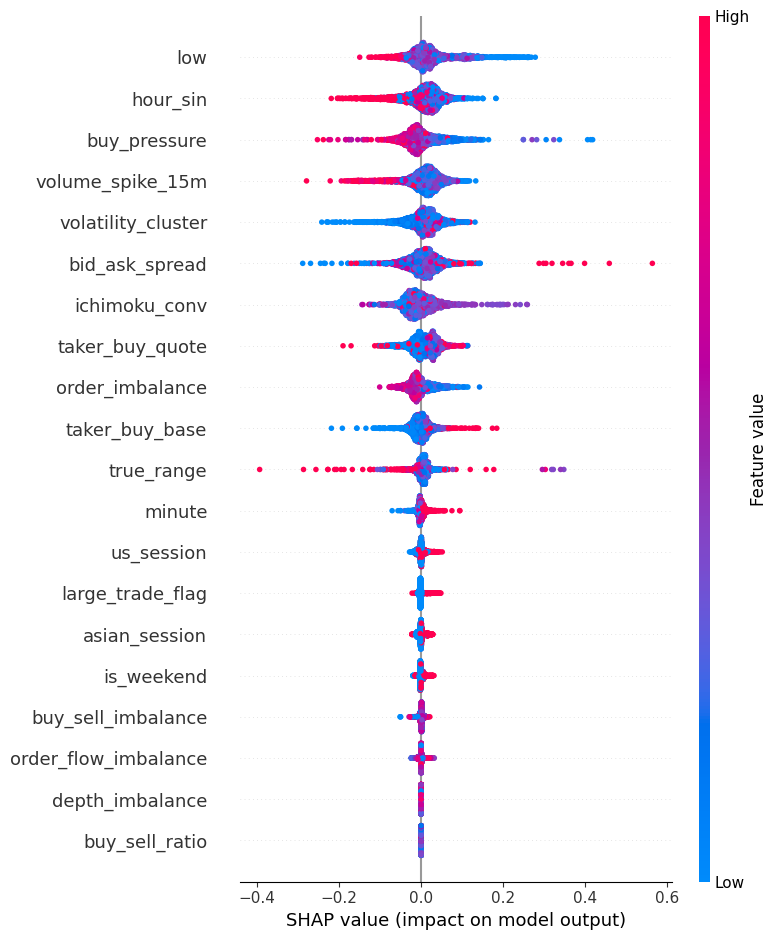

In [5]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 8.25% of total importance
Top 20 features explain 73.30% of total importance
Ratio (Top/Bottom): 8.89x


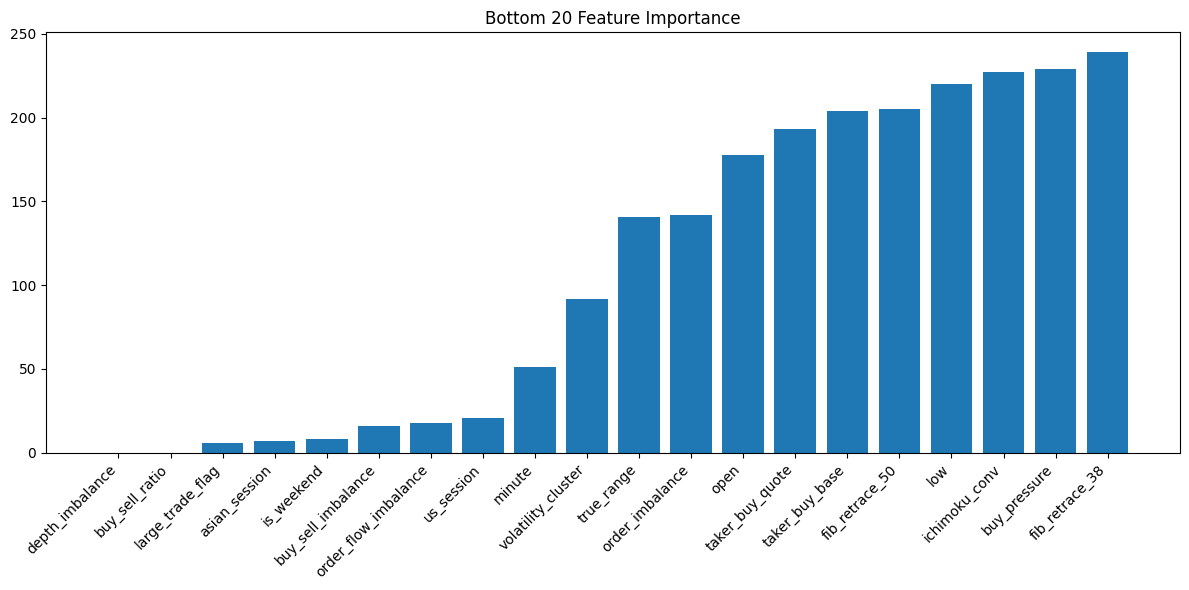

In [6]:
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store original params for later
org_params = manager.model.get_params()

# Init walkforward
walk_forward = WalkForwardAnalyzer(
    initial_train_ratio=0.3,
    step_ratio=0.07,
    threshold=manager.optimal_threshold
)

# Config new model for walk_forward
manager.configure_walk_forward_model()

# Define features and labels
X = manager.df.drop(["label"], axis=1)
y = manager.df["label"]

predictions, true_labels, metrics_history =  walk_forward.validate(
    model=manager.model,
    X=X,
    y=y,
    timestamp_col="timestamp",
    print_results=True
)

In [ ]:
# Plot validation results
walk_forward.plot_metrics_over_time()

In [ ]:
# Initialize ExperimentTracker
from utils.model.experiment_tracker import ExperimentTracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="15m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log walk_forward results
    tracker.log_walk_forward_results(experiment, metrics_history, initial_train_ratio=0.3, step_ratio=0.07)